In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import brentq
from scipy.constants import pi

In [2]:
# Define the beam properties
L = 10  # length of the beam in meters
E = 210e9  # Young's modulus in Pascals (example for steel)
I = 1e-6  # moment of inertia in meters^4 (example)
rho = 7850  # density in kg/m^3 (example for steel)
A = 0.01  

In [3]:
def natural_frequency_ss(n, L, E, I, rho, A):
    """
    Calculate the natural frequency for a simply supported beam.

    Parameters:
    n (int): Mode number (1, 2, 3, etc.).
    L (float): Length of the beam.
    E (float): Young's modulus of the beam material.
    I (float): Moment of inertia of the beam cross-section.
    rho (float): Density of the material.
    A (float): Cross-sectional area of the beam.

    Returns:
    float: Natural frequency in radians per second (ω).
    """
    return (n**2 * np.pi**2 / L**2) * np.sqrt(E * I / (rho * A))

Mode 1: Natural Frequency = 5.10 Hz
Mode 2: Natural Frequency = 20.42 Hz
Mode 3: Natural Frequency = 45.94 Hz
Mode 4: Natural Frequency = 81.68 Hz
Mode 5: Natural Frequency = 127.62 Hz


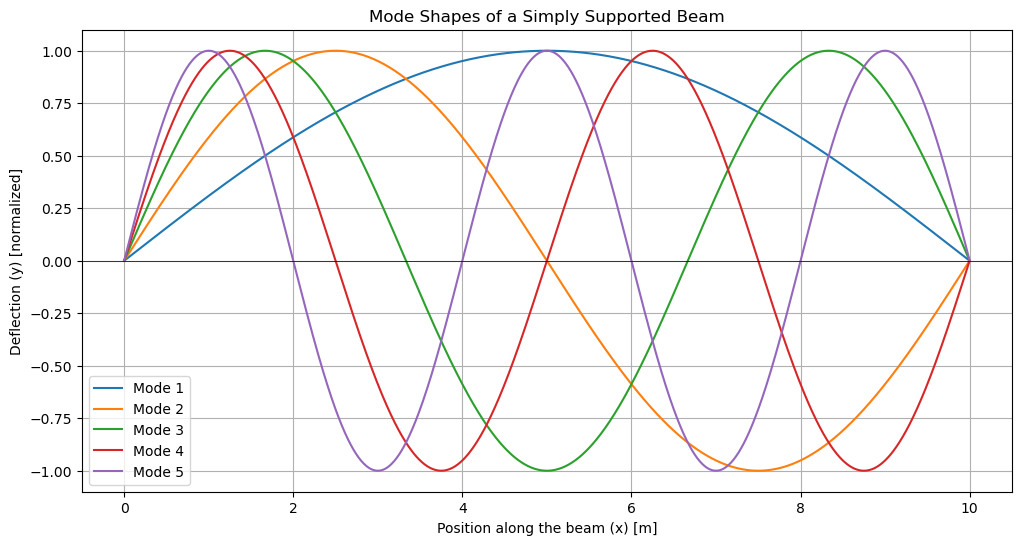

In [4]:
# Define the number of points for plotting
num_points = 1000

# Create the plot
plt.figure(figsize=(12, 6))

# Plot mode shapes and natural frequencies for the first 5 modes
for n in range(1, 6):
    # Create an array of x values from 0 to L (beam length)
    x = np.linspace(0, L, num_points)
    
    # Mode shape (sinusoidal wave based on mode number)
    y = np.sin((n * np.pi / L) * x)
    
    # Calculate natural frequency for mode n
    freq = natural_frequency_ss(n, L, E, I, rho, A)
    
    # Print mode number and corresponding natural frequency
    print(f"Mode {n}: Natural Frequency = {freq:.2f} Hz")
    
    # Plot the mode shape
    plt.plot(x, y, label=f'Mode {n}')

# Set up the plot labels and titles
plt.xlabel('Position along the beam (x) [m]')
plt.ylabel('Deflection (y) [normalized]')
plt.title('Mode Shapes of a Simply Supported Beam')
plt.axhline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend()

# Display the plot
plt.show()


In [5]:
# Define the number of points to generate along the beam length
num_points = 100  # number of points to generate

# # Create an empty DataFrame to store the data
df = pd.DataFrame()

# Calculate and store mode shapes and frequencies
for n in range(1, 6):  # First 5 modes
    x = np.linspace(0, L, num_points)  # Points along the beam length
    y = np.sin((n * np.pi / L) * x)    # Mode shape for simply supported beam
    freq = natural_frequency(n, L, E, I, rho, A)
    
    # Print the mode number and natural frequency (in radians per second)
    print(f"Mode {n}: Natural Frequency = {freq:.2f} rad/s")
    
    # Create a DataFrame for the current mode shape
    mode_df = pd.DataFrame({'x': x, f'Mode {n}': y})
    
    # Merge with the main DataFrame
    df = pd.concat([df, mode_df.set_index('x')], axis=1)

# Reset index to make 'x' a column again
df.reset_index(inplace=True)

# Save the DataFrame to an Excel file
# df.to_excel('simply_supported_beam_modes.xlsx', index=False)

print("Mode shapes and natural frequencies have been saved to 'simply_supported_beam_modes.xlsx'.")


NameError: name 'natural_frequency' is not defined

In [ ]:
df

In [6]:
import numpy as np
from scipy.optimize import brentq

def characteristic_equation_cf(beta_L):
    """
    Characteristic equation for a clamped-free (cantilever) beam.
    
    This function represents the transcendental equation for determining the 
    frequency parameter (beta_L) for clamped-free beams.

    Parameters:
    beta_L (float): Frequency parameter (beta * L) where beta is the frequency parameter
                    and L is the length of the beam.

    Returns:
    float: Value of the characteristic equation, which should equal 0 at the correct beta_L.
    """
    return np.cos(beta_L) * np.cosh(beta_L) + 1

# List to store beta_L roots (frequency parameters)
beta_cf = []

# Intervals to search for the roots of the characteristic equation
intervals = [(0, 2), (4, 7), (7, 10), (10, 13), (13, 16)]

for interval in intervals:
    root = brentq(characteristic_equation_cf, *interval)
    beta_cf.append(root)



In [7]:
# Calculate the natural frequencies
omega_n = [
    (beta**2 / L**2) * np.sqrt((E * I) / (rho * A)) for beta in beta_cf
        ]

# Print the frequency parameters (beta_cf) and corresponding natural frequencies
beta_cf, omega_n

([1.8751040687118365,
  4.694091132974033,
  7.854757438237613,
  10.995540734875465,
  14.137168391046416],
 [1.8185513613715325,
  11.396666843585834,
  31.91099716482962,
  62.53281832964459,
  103.37122930984154])

In [8]:
import numpy as np
from scipy.optimize import brentq

def characteristic_equation_cc(beta_L):
    """
    Characteristic equation for a clamped-clamped (both ends fixed) beam.
    
    The transcendental equation for determining the frequency parameter (beta_L)
    for clamped-clamped beams.

    Parameters:
    beta_L (float): Frequency parameter (beta * L) where beta is the frequency parameter
                    and L is the length of the beam.

    Returns:
    float: Value of the characteristic equation, which equals 0 at the correct beta_L.
    """
    return np.cos(beta_L) * np.cosh(beta_L) - 1

# List to store beta_L roots (frequency parameters)
beta_cc = []

# Intervals to search for the roots of the characteristic equation
intervals = [(4.5, 6.5), (7.5, 9.5), (10.5, 12.5), (13.5, 15.5)]

for interval in intervals:
    root = brentq(characteristic_equation_cc, *interval)
    beta_cc.append(root)


In [9]:

# Calculate the natural frequencies
omega_n = [
    (beta**2 / L**2) * np.sqrt((E * I) / (rho * A)) for beta in beta_cc
]

# Display the frequency parameters (beta_cc) and corresponding natural frequencies
beta_cc, omega_n


([4.730040744862704,
  7.853204624095838,
  10.995607838001671,
  14.137165491257353],
 [11.571897617864247,
  31.898381383861118,
  62.53358157731118,
  103.37118690322642])

In [10]:
# Clamped-Free (Cantilever) Mode Shape
def mode_shape_cf(x, beta):
    """
    Calculate mode shape for a Clamped-Free (Cantilever) beam.
    """
    return -(np.cosh(beta * x) - np.cos(beta * x)) / (np.cosh(beta * L) - np.cos(beta * L))

# Clamped-Clamped Mode Shape
def mode_shape_cc(x, beta):
    """
    Calculate mode shape for a Clamped-Clamped (Both Ends Fixed) beam.
    """
    return np.sin(beta * x) - (np.sin(beta * L) / np.sinh(beta * L)) * np.sinh(beta * x)

# Simply-Supported Mode Shape
def mode_shape_ss(x, n):
    """
    Calculate mode shape for a Simply-Supported beam.
    """
    return np.sin(n * np.pi * x / L)

# Normalize the mode shapes
def normalize_mode_shape(Y):
    """
    Normalize the mode shape to have a maximum absolute value of 1.
    """
    return Y / np.max(np.abs(Y))

In [11]:
# Find beta for Clamped-Free and Clamped-Clamped beams using brentq
def find_beta_cf():
    """
    Find beta for the Clamped-Free beam using the root-finding method.
    """
    intervals = [(0, 2), (4, 7), (7, 10), (10, 13), (13, 16)]
    beta_cf = [brentq(characteristic_equation_cf, *interval) for interval in intervals]
    return beta_cf

def find_beta_cc():
    """
    Find beta for the Clamped-Clamped beam using the root-finding method.
    """
    intervals = [(4.5, 6.5), (7.5, 9.5), (10.5, 12.5), (13.5, 15.5)]
    beta_cc = [brentq(characteristic_equation_cc, *interval) for interval in intervals]
    return beta_cc

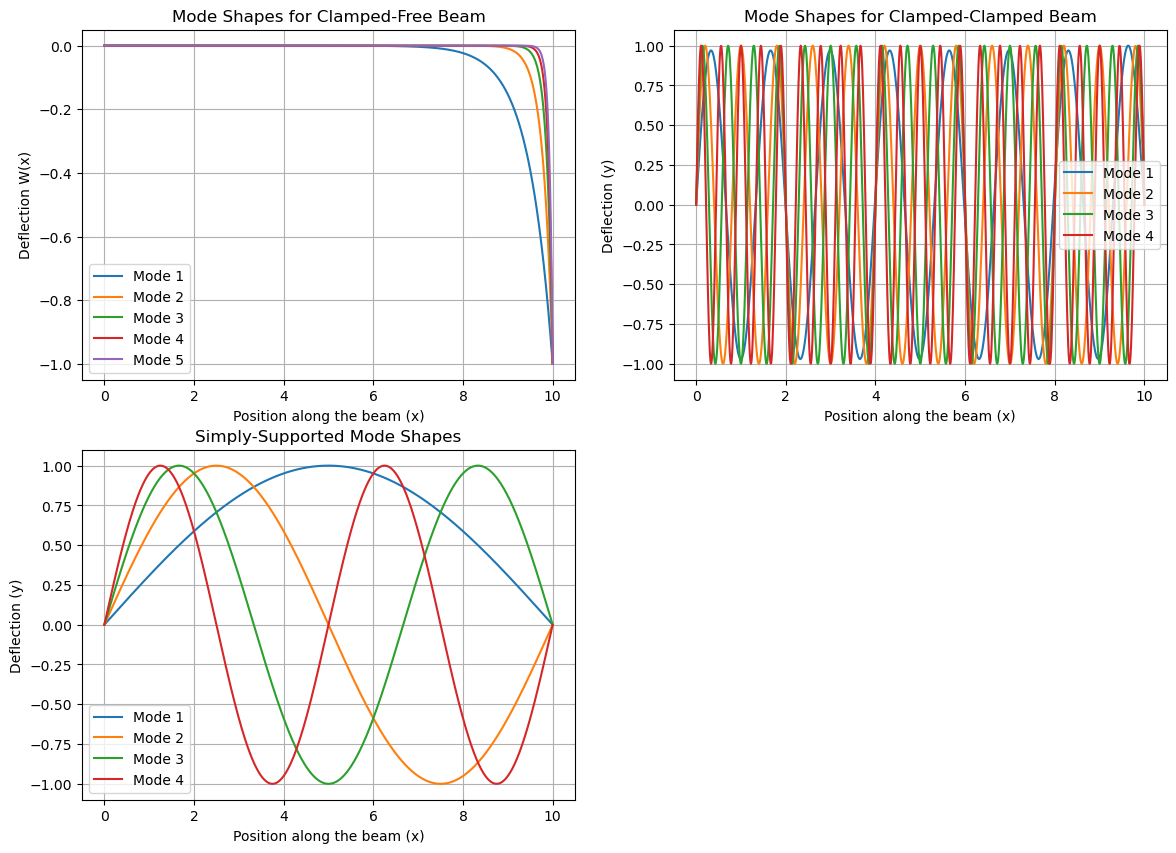

In [12]:
# Create plots for mode shapes
def plot_mode_shapes():
    # Number of points for plotting
    num_points = 1000
    x = np.linspace(0, L, num_points)  # x-axis values
    plt.figure(figsize=(14, 10))

    # Plot clamped-free beam mode shapes
    plt.subplot(2, 2, 1)
    # Plot Clamped-Free mode shapes
    beta_cf = find_beta_cf()  # Get beta values
    for i, beta in enumerate(beta_cf):
        y_cf = normalize_mode_shape(mode_shape_cf(x, beta))
        plt.plot(x, y_cf, label=f'Mode {i+1}')
    
    plt.title('Mode Shapes for Clamped-Free Beam')
    plt.xlabel('Position along the beam (x)')
    plt.ylabel('Deflection W(x)')
    plt.legend()
    plt.grid(True)

    plt.subplot(2, 2, 2)
    # Plot Clamped-Clamped mode shapes
    beta_cc = find_beta_cc()  # Get beta values
    for i, beta in enumerate(beta_cc):
        y_cc = normalize_mode_shape(mode_shape_cc(x, beta))
        plt.plot(x, y_cc, label=f'Mode {i+1}')

    plt.title('Mode Shapes for Clamped-Clamped Beam')
    plt.xlabel('Position along the beam (x)')
    plt.ylabel('Deflection (y)')
    plt.grid(True)
    plt.legend()
  
    plt.subplot(2, 2, 3)
    # Plot Simply-Supported mode shapes
    for n in range(1, 5):  # Plot for first 3 modes
        y_ss = normalize_mode_shape(mode_shape_ss(x, n))
        plt.plot(x, y_ss, label=f'Mode {n}')
    
    plt.title('Simply-Supported Mode Shapes')
    plt.xlabel('Position along the beam (x)')
    plt.ylabel('Deflection (y)')
    plt.grid(True)
    plt.legend()
   

# Run the plotting function
plot_mode_shapes()
